In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
with open('/content/drive/My Drive/MS_RSC_DL_21-22/foo.txt', 'w') as f:
  f.write('Hello Google Drive!Luka!!')
!cat /content/drive/My\ Drive/DeepLearning/foo.txt

# TensorFlow 2.0

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Agrega una dimension de canales
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

(10000, 28, 28, 1)


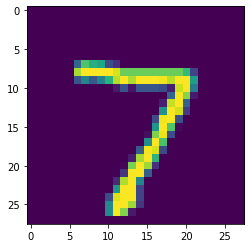

In [4]:
print(x_test.shape)
plt.imshow(x_test[0,:,:,0])
plt.show()

(10000, 28, 28, 1)


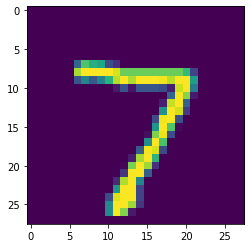

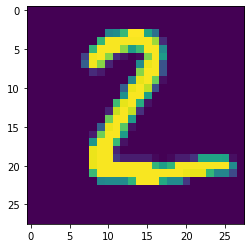

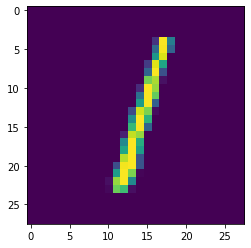

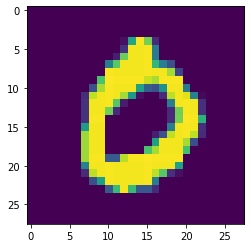

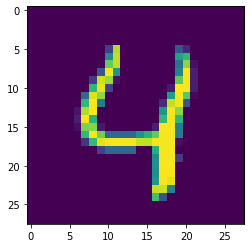

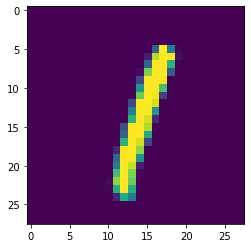

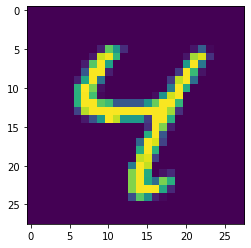

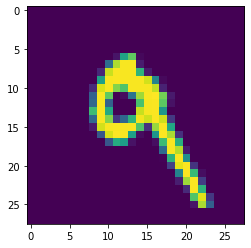

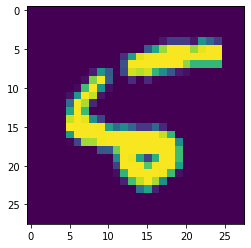

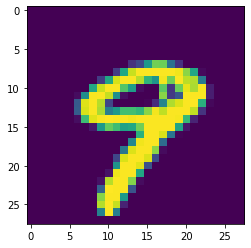

In [16]:
print(x_test.shape)
for i in range(10):
  plt.imshow(x_test[i,:,:,0])
  plt.show()

## Definición de la red neuronal

In [5]:
class MNIST_Model(Model):
    def __init__(self):
        super(MNIST_Model, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)



## Crear instancia del modelo

In [6]:
# Create an instance of the model
model = MNIST_Model()

## Compilar: para configurar tipo de optimizador y el Loss

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Ejecutar el entrenamiento

In [9]:
EPOCHS = 10
H = model.fit(x_train, y_train, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 8s 3ms/step - loss: 0.2564 - accuracy: 0.9265 - val_loss: 0.1404 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9659 - val_loss: 0.1017 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9758 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0740 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0686 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0796 - val_accuracy: 0.9771
Epo

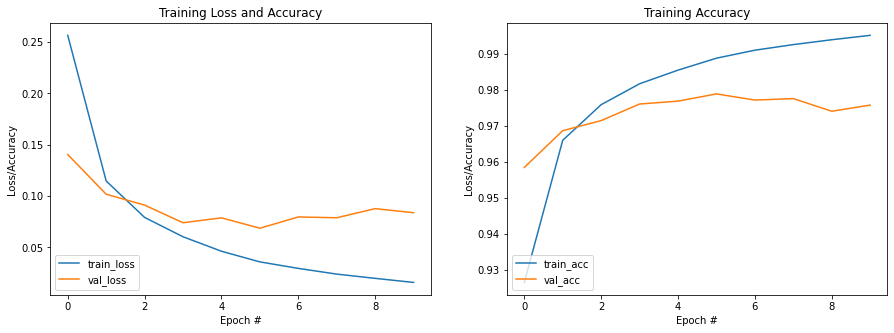

In [10]:
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
#plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.subplot(122)
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [17]:
test_out = model(x_test, training=False)
print(test_out)

tf.Tensor(
[[7.14522941e-10 9.22598694e-13 1.53535552e-07 ... 9.98315573e-01
  3.15462181e-08 1.26603013e-07]
 [7.10269343e-11 2.49335042e-08 1.00000000e+00 ... 9.12516641e-16
  4.53593052e-10 2.54343877e-16]
 [1.06198559e-06 9.99947548e-01 4.81495908e-06 ... 4.27256164e-05
  1.93955816e-06 4.85350498e-08]
 ...
 [4.73547666e-18 5.17090109e-15 2.21370870e-16 ... 1.56998556e-08
  2.57580979e-09 3.91788831e-07]
 [9.98620810e-14 3.88908401e-14 8.02362327e-14 ... 1.24703876e-11
  1.92956819e-07 3.91204073e-15]
 [8.62140428e-11 3.71774090e-16 2.95008545e-10 ... 3.00532668e-15
  8.58335416e-15 1.18583545e-14]], shape=(10000, 10), dtype=float32)


 Real = 7 :: Pred. = 7 Conf. 99.83% // second  3 %0.17
 


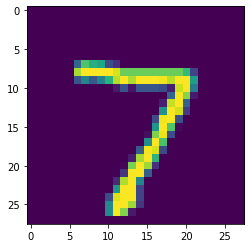

 Real = 2 :: Pred. = 2 Conf. 100.0% // second  1 %0.0
 


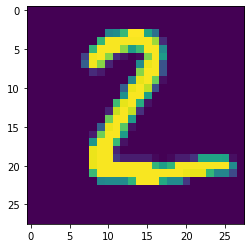

 Real = 1 :: Pred. = 1 Conf. 99.99% // second  7 %0.0
 


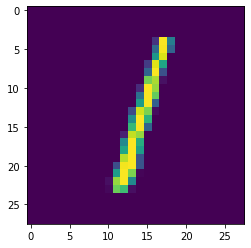

 Real = 0 :: Pred. = 0 Conf. 100.0% // second  7 %0.0
 


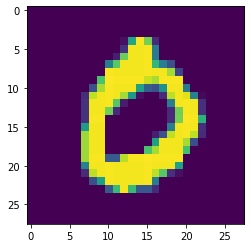

 Real = 4 :: Pred. = 4 Conf. 100.0% // second  9 %0.0
 


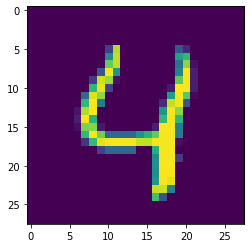

 Real = 1 :: Pred. = 1 Conf. 99.99% // second  7 %0.01
 


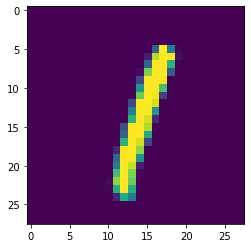

 Real = 4 :: Pred. = 4 Conf. 100.0% // second  9 %0.0
 


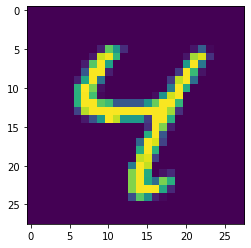

 Real = 9 :: Pred. = 9 Conf. 100.0% // second  3 %0.0
 


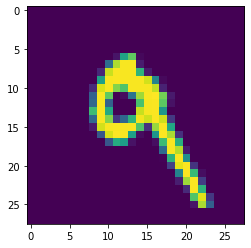

 Real = 5 :: Pred. = 5 Conf. 99.55% // second  6 %0.45
 


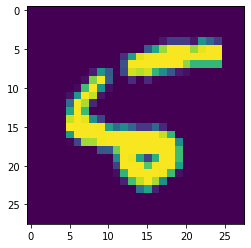

 Real = 9 :: Pred. = 9 Conf. 99.99% // second  4 %0.01
 


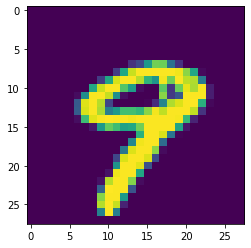

 Real = 0 :: Pred. = 0 Conf. 100.0% // second  2 %0.0
 


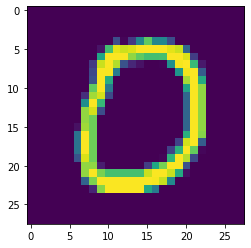

 Real = 6 :: Pred. = 6 Conf. 100.0% // second  0 %0.0
 


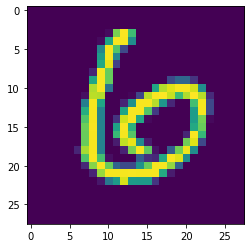

 Real = 9 :: Pred. = 9 Conf. 100.0% // second  3 %0.0
 


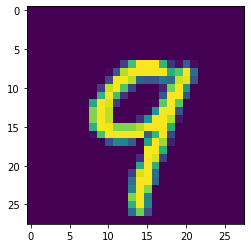

 Real = 0 :: Pred. = 0 Conf. 100.0% // second  7 %0.0
 


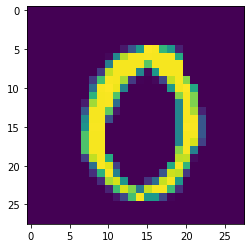

 Real = 1 :: Pred. = 1 Conf. 100.0% // second  3 %0.0
 


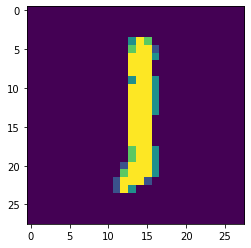

 Real = 5 :: Pred. = 5 Conf. 99.97% // second  3 %0.03
 


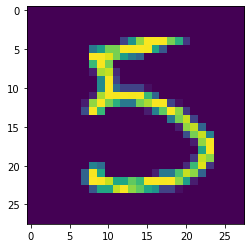

 Real = 9 :: Pred. = 9 Conf. 100.0% // second  4 %0.0
 


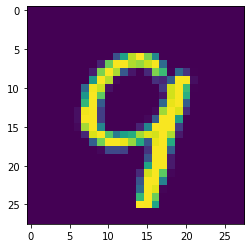

 Real = 7 :: Pred. = 7 Conf. 99.99% // second  2 %0.01
 


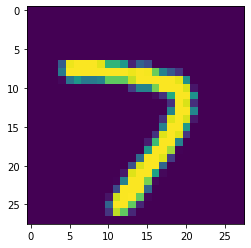

 Real = 3 :: Pred. = 3 Conf. 99.19% // second  8 %0.79
 


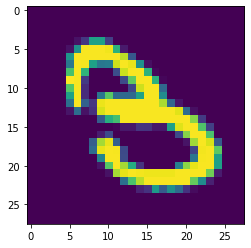

 Real = 4 :: Pred. = 4 Conf. 100.0% // second  9 %0.0
 


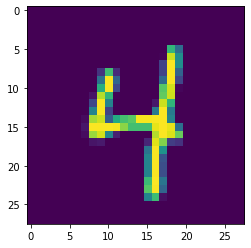

In [24]:
for i in range(20):
    sort_id = test_out[i,:].numpy().argsort()[::-1]
    s_id=sort_id[1]
    print(' Real = ' + str(y_test[i]) + ' :: Pred. = ' + str(np.argmax(test_out[i,:])) + ' Conf. ' + str((100*test_out[i,:].numpy().max()).round(2)) + '% // second  ' + str(sort_id[1])+ ' %' + str((100*test_out[i,:].numpy()[s_id]).round(2)))
    print(' ')
    #print('Predicted = ' + str(train_out[i,:].numpy().round(2)) + ' ::  Real = ' + str(y_train[i]))
    plt.imshow(x_test[i,:,:,0])
    plt.show()

In [18]:
np.argmax(test_out[0,:])

7

In [19]:
result = np.matrix(test_out).argmax(1).reshape(y_test.shape) - y_test
idres = np.where(result>0)[1]

In [23]:
# DRAW INCORRECTLY CLASSIFIED SAMPLES
#idres = np.where(result>0)[1]  # find de id of the elments classified incorrectly
print('Wrong samples : ' +  str(idres.shape[0]))
for i in idres:
    sort_id = test_out[i,:].numpy().argsort()[::-1]
    s_id=sort_id[1]
    print(' Real = ' + str(y_test[i]) + ' :: Pred. = ' + str(np.argmax(test_out[i,:])) + ' Conf. ' + str((100*test_out[i,:].numpy().max()).round(2)) + '% // second  ' + str(sort_id[1])+ ' %' + str((100*test_out[i,:].numpy()[s_id]).round(2)))
    print(' ')
    #print('Predicted = ' + str(train_out[i,:].numpy().round(2)) + ' ::  Real = ' + str(y_train[i]))
    #plt.imshow(x_test[i,:,:,0])
    #plt.show()

Wrong samples : 99
 Real = 2 :: Pred. = 4 Conf. 80.7% // second  2 %16.12
 
 Real = 4 :: Pred. = 6 Conf. 61.76% // second  2 %38.16
 
 Real = 2 :: Pred. = 7 Conf. 99.73% // second  2 %0.22
 
 Real = 3 :: Pred. = 7 Conf. 62.31% // second  3 %37.68
 
 Real = 4 :: Pred. = 7 Conf. 98.68% // second  4 %1.21
 
 Real = 2 :: Pred. = 7 Conf. 50.65% // second  2 %49.34
 
 Real = 2 :: Pred. = 7 Conf. 45.52% // second  1 %39.32
 
 Real = 4 :: Pred. = 9 Conf. 76.67% // second  4 %23.12
 
 Real = 5 :: Pred. = 8 Conf. 88.12% // second  5 %11.88
 
 Real = 8 :: Pred. = 9 Conf. 97.9% // second  8 %1.95
 
 Real = 1 :: Pred. = 2 Conf. 54.63% // second  1 %43.01
 
 Real = 4 :: Pred. = 6 Conf. 60.26% // second  4 %39.73
 
 Real = 7 :: Pred. = 8 Conf. 93.86% // second  7 %4.59
 
 Real = 3 :: Pred. = 5 Conf. 61.96% // second  3 %35.58
 
 Real = 4 :: Pred. = 9 Conf. 91.61% // second  4 %8.25
 
 Real = 5 :: Pred. = 9 Conf. 65.28% // second  5 %25.79
 
 Real = 7 :: Pred. = 9 Conf. 40.5% // second  0 %26.24
 
 Re

In [25]:
model.save('/content/drive/My Drive/MS_RSC_DL_21-22/MNIST_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/MS_RSC_DL_21-22/MNIST_model/assets


In [ ]:
model.summary()

# Rede con Capa convolucional

In [11]:
class MNIST_Model1(Model):
    def __init__(self):
        super(MNIST_Model1, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model1 = MNIST_Model1()

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
model1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
EPOCHS = 10
H1 = model1.fit(x_train, y_train, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 19s 6ms/step - loss: 0.1324 - accuracy: 0.9602 - val_loss: 0.0611 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0499 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0551 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0655 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0620 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0706 - val_accuracy: 0.9

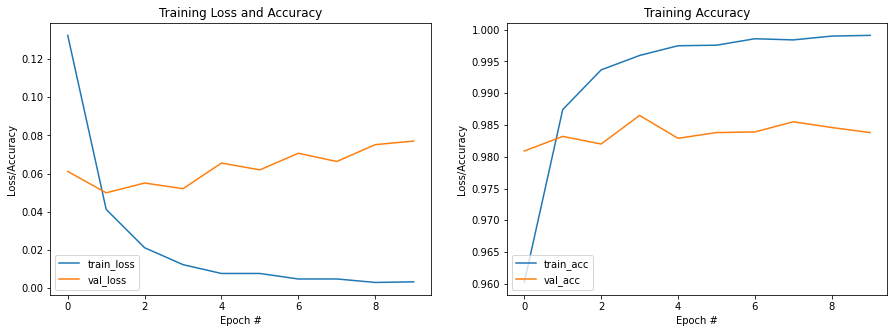

In [15]:
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
#plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(N, H1.history["loss"], label="train_loss")
plt.plot(N, H1.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.subplot(122)
plt.plot(N, H1.history["accuracy"], label="train_acc")
plt.plot(N, H1.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

# Otra manera de entrenar  el modelo: 

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [ ]:
train_ds

In [ ]:
EPOCHS = 9

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

    # Reset the metrics for the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.13139115273952484, Accuracy: 96.03666687011719, Test Loss: 0.0715998113155365, Test Accuracy: 97.75
Epoch 2, Loss: 0.04132910445332527, Accuracy: 98.76166534423828, Test Loss: 0.057863157242536545, Test Accuracy: 98.04999542236328
Epoch 3, Loss: 0.021985795348882675, Accuracy: 99.3316650390625, Test Loss: 0.05787903815507889, Test Accuracy: 98.20999908447266
Epoch 4, Loss: 0.013080131262540817, Accuracy: 99.5616683959961, Test Loss: 0.058765970170497894, Test Accuracy: 98.25
Epoch 5, Lo

In [ ]:
tf.executing_eagerly()

True

In [ ]:
tf.__version__

'2.2.0-rc1'

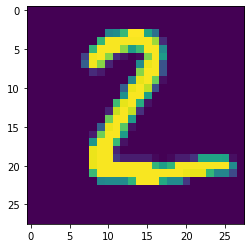

In [ ]:
plt.imshow(x_test[1,:,:,0])
plt.show()

In [ ]:
# Save predictions for future checks
#predictions = model.predict(x_test)
model.layers

In [ ]:
test_out = model(x_test, training=False)
print(test_out)

tf.Tensor(
[[2.2147294e-14 1.3459891e-14 4.0653050e-11 ... 1.0000000e+00
  1.7785444e-13 5.4444659e-14]
 [1.6129503e-16 6.5147250e-12 1.0000000e+00 ... 1.9266803e-25
  3.3121307e-19 1.6350506e-20]
 [1.3684196e-11 9.9999869e-01 5.4967031e-10 ... 8.4448608e-09
  3.5833800e-08 5.3837317e-13]
 ...
 [4.7333529e-23 1.3058222e-14 5.5019454e-21 ... 1.6137490e-14
  1.8205017e-14 4.8481933e-14]
 [1.6775494e-15 1.9758134e-16 1.1000098e-20 ... 1.3091252e-16
  3.3917551e-08 5.8194071e-18]
 [2.1173925e-18 2.2673624e-18 1.4440850e-18 ... 2.7368042e-21
  8.3201669e-16 2.1542558e-21]], shape=(10000, 10), dtype=float32)


In [ ]:
if False:
  result = np.matrix(test_out).argmax(1).reshape(y_test.shape) - y_test
  idres = np.where(result>0)[1]
else:
  result = np.matrix(test_out).max(1).reshape(y_test.shape)
  idres = np.where(result<0.70)[1]

print(idres.shape)

(60,)


In [ ]:
# DRAW INCORRECTLY CLASSIFIED SAMPLES
#idres = np.where(result>0)[1]  # find de id of the elments classified incorrectly
print('Wrong samples : ' +  str(idres.shape[0]))
for i in idres:
    sort_id = test_out[i,:].numpy().argsort()[::-1]
    s_id=sort_id[1]
    print(' Real = ' + str(y_test[i]) + ' :: Pred. = ' + str(np.argmax(test_out[i,:])) + ' Conf. ' + str((100*test_out[i,:].numpy().max()).round(2)) + '% // second  ' + str(sort_id[1])+ ' %' + str((100*test_out[i,:].numpy()[s_id]).round(2)))
    print(' ')
    #print('Predicted = ' + str(train_out[i,:].numpy().round(2)) + ' ::  Real = ' + str(y_train[i]))
    #plt.imshow(x_train[i,:,:,0])
    #plt.show()

Wrong samples : 60
 Real = 4 :: Pred. = 4 Conf. 68.72% // second  9 %31.28
 
 Real = 9 :: Pred. = 9 Conf. 65.83% // second  8 %34.01
 
 Real = 8 :: Pred. = 3 Conf. 51.22% // second  8 %48.63
 
 Real = 6 :: Pred. = 0 Conf. 58.3% // second  6 %41.64
 
 Real = 7 :: Pred. = 2 Conf. 51.73% // second  8 %32.43
 
 Real = 7 :: Pred. = 7 Conf. 46.33% // second  2 %28.93
 
 Real = 9 :: Pred. = 5 Conf. 40.98% // second  9 %31.78
 
 Real = 9 :: Pred. = 9 Conf. 68.57% // second  5 %31.15
 
 Real = 9 :: Pred. = 8 Conf. 66.46% // second  9 %33.54
 
 Real = 2 :: Pred. = 3 Conf. 52.8% // second  2 %46.75
 
 Real = 3 :: Pred. = 5 Conf. 68.41% // second  3 %31.59
 
 Real = 0 :: Pred. = 6 Conf. 56.95% // second  0 %43.05
 
 Real = 5 :: Pred. = 6 Conf. 54.38% // second  5 %45.45
 
 Real = 9 :: Pred. = 5 Conf. 63.84% // second  3 %23.14
 
 Real = 3 :: Pred. = 3 Conf. 67.45% // second  2 %24.12
 
 Real = 9 :: Pred. = 5 Conf. 58.35% // second  9 %41.64
 
 Real = 9 :: Pred. = 2 Conf. 35.13% // second  8 %32.87

Predicted = 6 ::  Real = 6


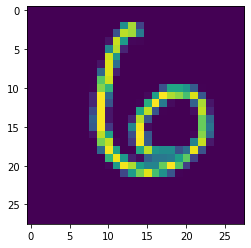

Predicted = 0 ::  Real = 0


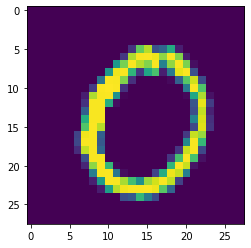

Predicted = 5 ::  Real = 5


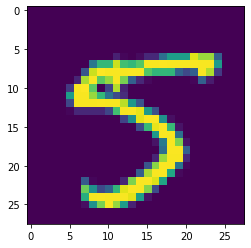

Predicted = 4 ::  Real = 4


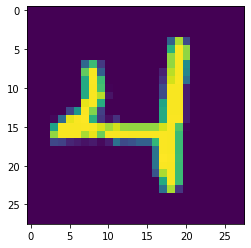

Predicted = 9 ::  Real = 9


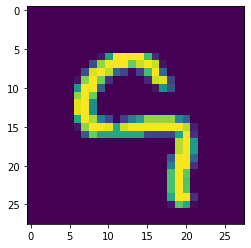

Predicted = 9 ::  Real = 9


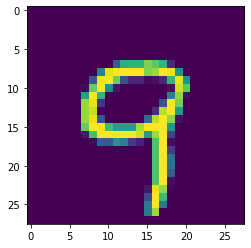

Predicted = 2 ::  Real = 2


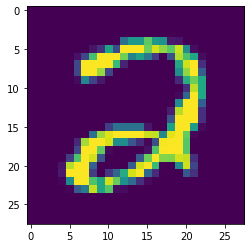

Predicted = 1 ::  Real = 1


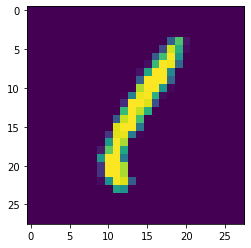

Predicted = 9 ::  Real = 9


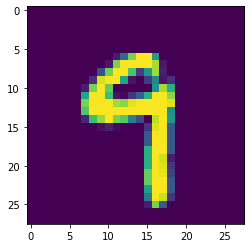

Predicted = 4 ::  Real = 4


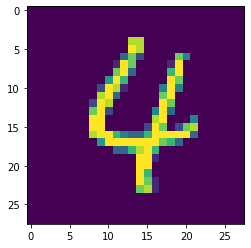

In [ ]:
st=100
for i in range(10):
    print('Predicted = ' + str(np.argmax(test_out[st+i,:])) + ' ::  Real = ' + str(y_test[st+i]))
    plt.imshow(x_test[st+i,:,:,0])
    plt.show()

In [ ]:
len(model.trainable_variables)

6

In [ ]:
y_test[100:110]

array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4], dtype=uint8)

In [ ]:
result = np.matrix(test_out).argmax(1).reshape(y_test.shape) - y_test
result

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_out = model(x_train, training=False)


In [ ]:
result.shape

(1, 60000)

In [ ]:
if False:
  result = np.matrix(train_out).argmax(1).reshape(y_train.shape) - y_train
  idres = np.where(result>0)[1]
else:
  result = np.matrix(train_out).max(1).reshape(y_train.shape)
  idres = np.where(result<0.70)[1]

print(idres.shape)


(1283,)


In [ ]:
mid = 100
print(train_out[mid,:].numpy().round(2))
print(train_out[mid,:].numpy().argsort()[::-1])

[0.   0.   0.   0.   0.   0.98 0.01 0.   0.   0.01]
[5 9 6 8 0 2 3 1 4 7]


In [ ]:
# DRAW INCORRECTLY CLASSIFIED SAMPLES
#idres = np.where(result>0)[1]  # find de id of the elments classified incorrectly
print('Wrong samples : ' +  str(idres.shape[0]))
for i in idres:
    sort_id = train_out[i,:].numpy().argsort()[::-1]
    s_id=sort_id[1]
    print(' Real = ' + str(y_train[i]) + ' :: Pred. = ' + str(np.argmax(train_out[i,:])) + ' Conf. ' + str((100*train_out[i,:].numpy().max()).round(2)) + '% // second  ' + str(sort_id[1])+ ' %' + str((100*train_out[i,:].numpy()[s_id]).round(2)))
    print(' ')
    #print('Predicted = ' + str(train_out[i,:].numpy().round(2)) + ' ::  Real = ' + str(y_train[i]))
    #plt.imshow(x_train[i,:,:,0])
    #plt.show()

Wrong samples : 1283
 Real = 8 :: Pred. = 8 Conf. 62.99% // second  9 %36.7
 
 Real = 1 :: Pred. = 1 Conf. 66.98% // second  2 %32.69
 
 Real = 1 :: Pred. = 4 Conf. 63.94% // second  1 %29.09
 
 Real = 8 :: Pred. = 9 Conf. 48.17% // second  8 %38.8
 
 Real = 2 :: Pred. = 0 Conf. 61.52% // second  6 %34.84
 
 Real = 7 :: Pred. = 9 Conf. 46.04% // second  7 %36.48
 
 Real = 7 :: Pred. = 7 Conf. 49.34% // second  4 %46.68
 
 Real = 7 :: Pred. = 7 Conf. 64.59% // second  0 %35.31
 
 Real = 7 :: Pred. = 7 Conf. 50.59% // second  0 %39.23
 
 Real = 1 :: Pred. = 1 Conf. 64.67% // second  6 %26.27
 
 Real = 2 :: Pred. = 2 Conf. 64.81% // second  1 %35.18
 
 Real = 3 :: Pred. = 3 Conf. 68.59% // second  7 %31.38
 
 Real = 3 :: Pred. = 3 Conf. 57.44% // second  5 %42.28
 
 Real = 2 :: Pred. = 7 Conf. 68.68% // second  2 %19.31
 
 Real = 5 :: Pred. = 5 Conf. 59.03% // second  6 %40.81
 
 Real = 4 :: Pred. = 4 Conf. 55.44% // second  9 %44.56
 
 Real = 5 :: Pred. = 5 Conf. 57.14% // second  4 %17.

Wrong samples : 82
Predicted = 9 ::  Real = 2


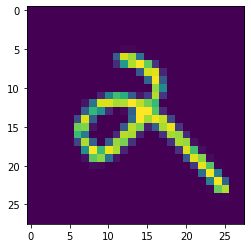

Predicted = 8 ::  Real = 5


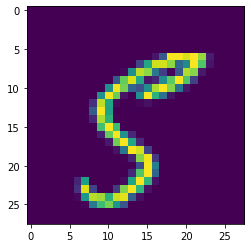

Predicted = 7 ::  Real = 2


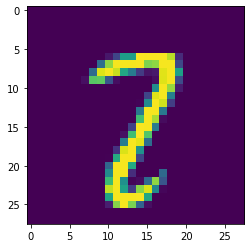

Predicted = 7 ::  Real = 2


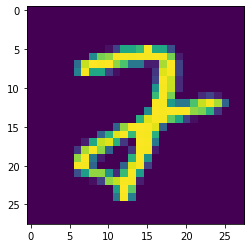

Predicted = 6 ::  Real = 0


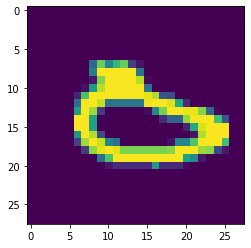

Predicted = 9 ::  Real = 4


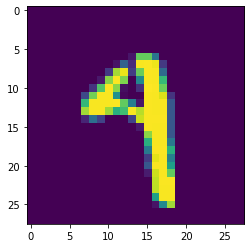

Predicted = 9 ::  Real = 7


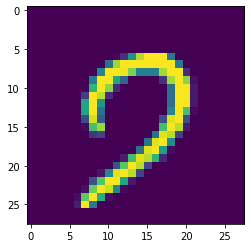

Predicted = 5 ::  Real = 3


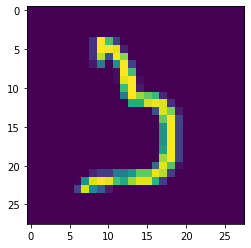

Predicted = 5 ::  Real = 3


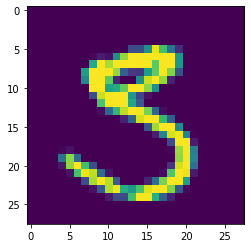

Predicted = 9 ::  Real = 7


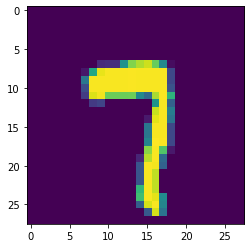

Predicted = 6 ::  Real = 4


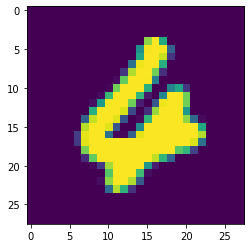

Predicted = 8 ::  Real = 7


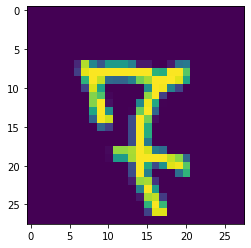

Predicted = 9 ::  Real = 4


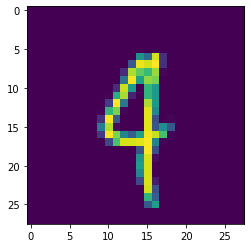

Predicted = 9 ::  Real = 4


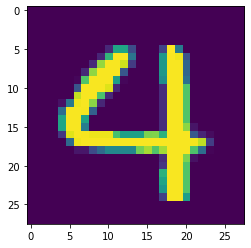

Predicted = 9 ::  Real = 7


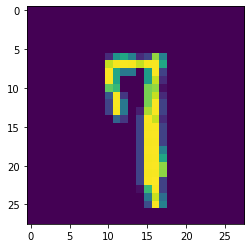

Predicted = 6 ::  Real = 5


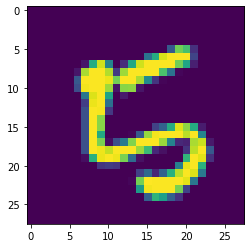

Predicted = 7 ::  Real = 3


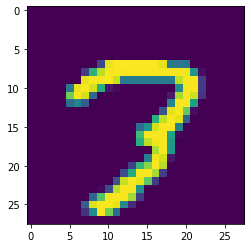

Predicted = 8 ::  Real = 2


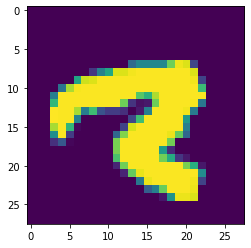

Predicted = 9 ::  Real = 7


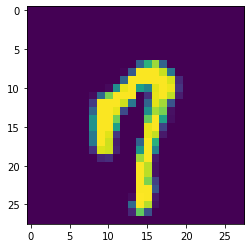

Predicted = 9 ::  Real = 4


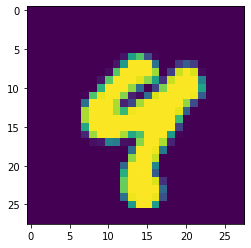

Predicted = 8 ::  Real = 3


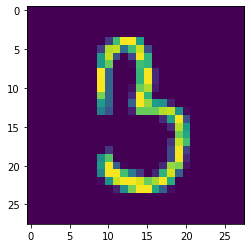

Predicted = 9 ::  Real = 4


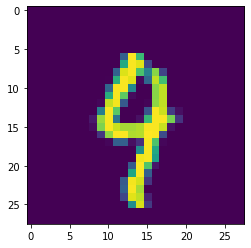

Predicted = 8 ::  Real = 2


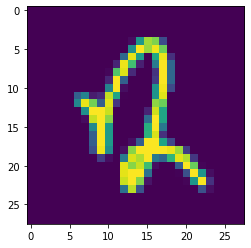

Predicted = 9 ::  Real = 4


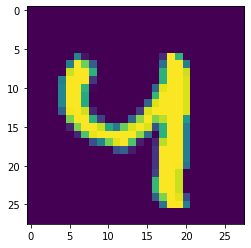

Predicted = 9 ::  Real = 4


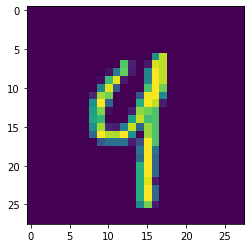

Predicted = 8 ::  Real = 3


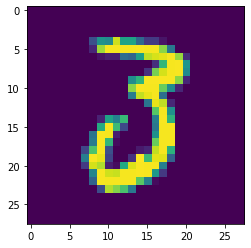

Predicted = 7 ::  Real = 3


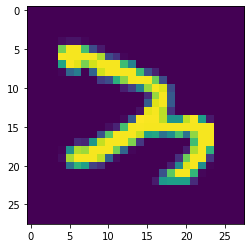

Predicted = 5 ::  Real = 3


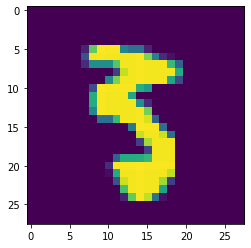

Predicted = 9 ::  Real = 7


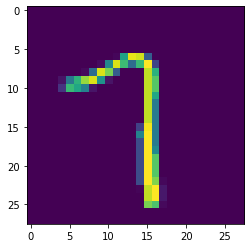

Predicted = 9 ::  Real = 4


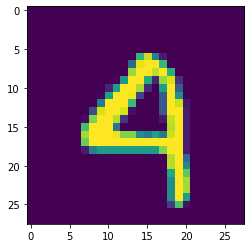

Predicted = 8 ::  Real = 2


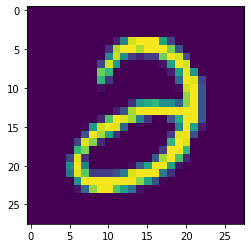

Predicted = 7 ::  Real = 4


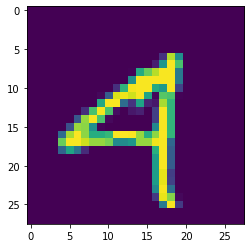

Predicted = 8 ::  Real = 2


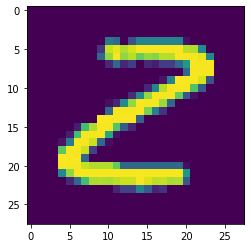

Predicted = 9 ::  Real = 4


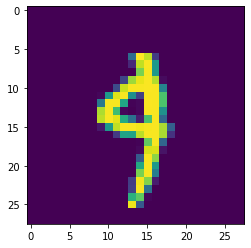

Predicted = 9 ::  Real = 8


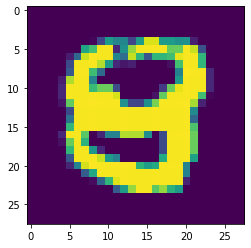

Predicted = 8 ::  Real = 6


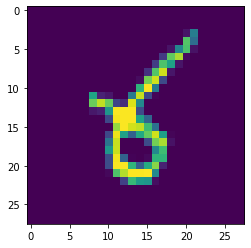

Predicted = 8 ::  Real = 5


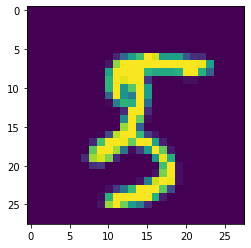

Predicted = 8 ::  Real = 5


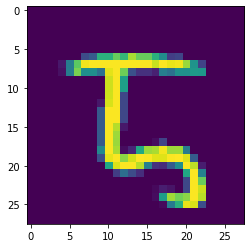

Predicted = 6 ::  Real = 4


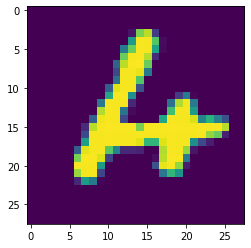

Predicted = 8 ::  Real = 7


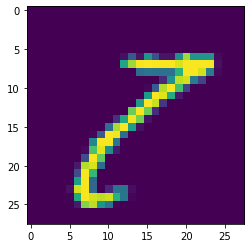

Predicted = 8 ::  Real = 6


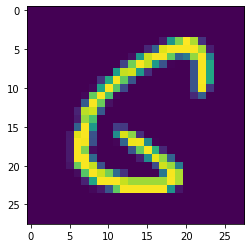

Predicted = 6 ::  Real = 5


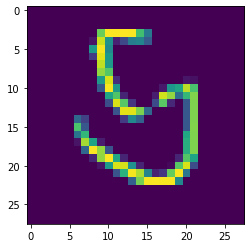

Predicted = 9 ::  Real = 7


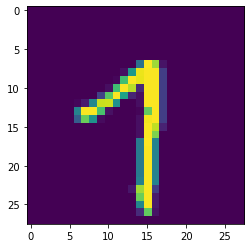

Predicted = 7 ::  Real = 2


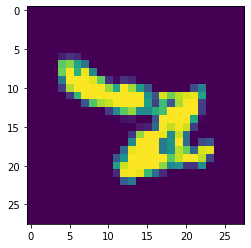

Predicted = 9 ::  Real = 7


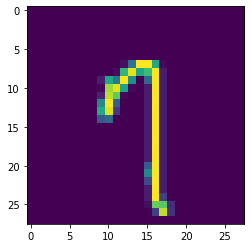

Predicted = 9 ::  Real = 7


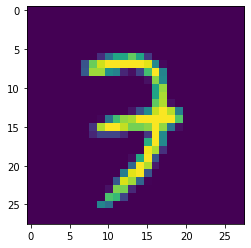

Predicted = 8 ::  Real = 2


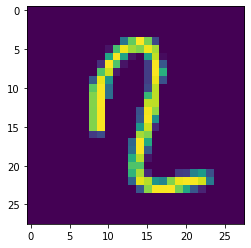

Predicted = 6 ::  Real = 4


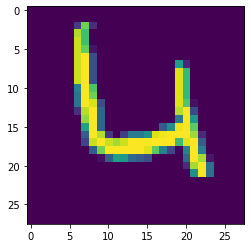

Predicted = 7 ::  Real = 2


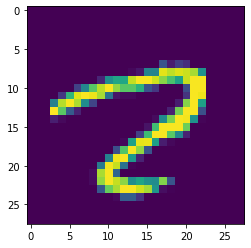

Predicted = 9 ::  Real = 5


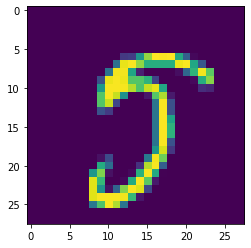

Predicted = 6 ::  Real = 5


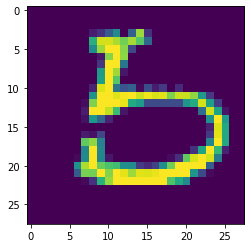

Predicted = 8 ::  Real = 6


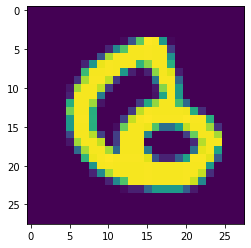

Predicted = 9 ::  Real = 7


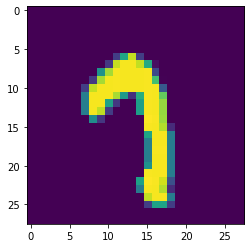

Predicted = 5 ::  Real = 3


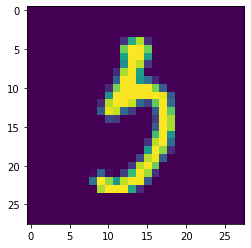

Predicted = 9 ::  Real = 4


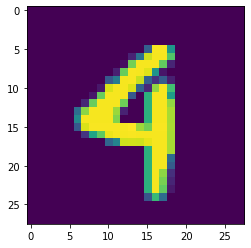

Predicted = 9 ::  Real = 4


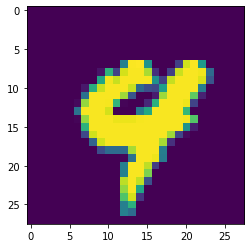

Predicted = 8 ::  Real = 2


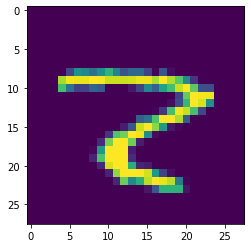

Predicted = 9 ::  Real = 4


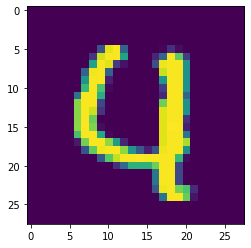

Predicted = 6 ::  Real = 1


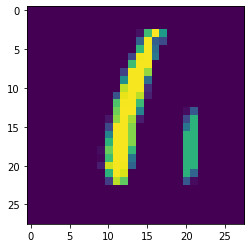

Predicted = 8 ::  Real = 2


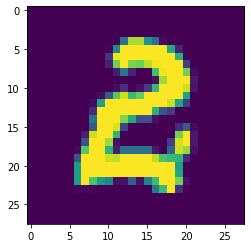

Predicted = 9 ::  Real = 7


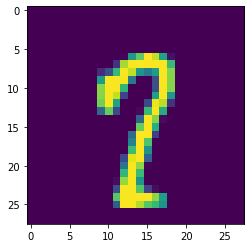

Predicted = 9 ::  Real = 4


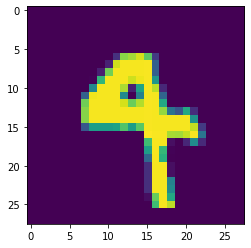

Predicted = 8 ::  Real = 3


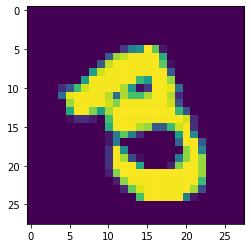

Predicted = 8 ::  Real = 3


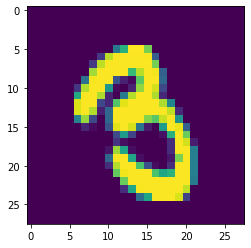

Predicted = 8 ::  Real = 3


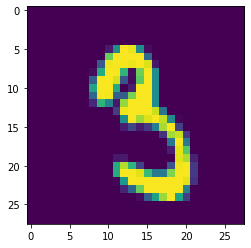

Predicted = 9 ::  Real = 8


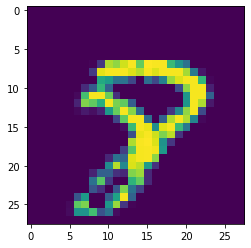

Predicted = 7 ::  Real = 0


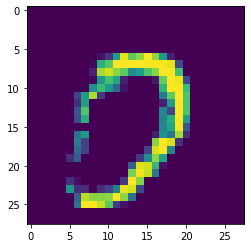

Predicted = 6 ::  Real = 0


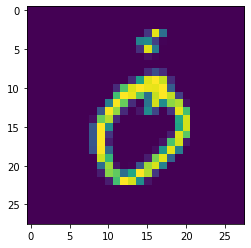

Predicted = 8 ::  Real = 5


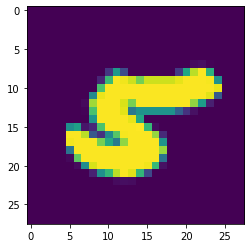

Predicted = 8 ::  Real = 1


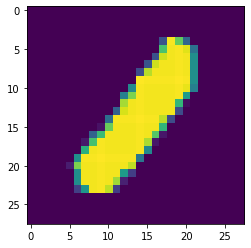

Predicted = 8 ::  Real = 1


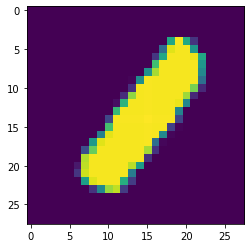

Predicted = 8 ::  Real = 2


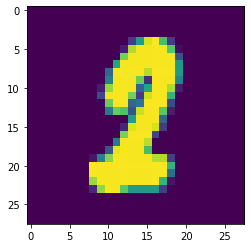

Predicted = 9 ::  Real = 3


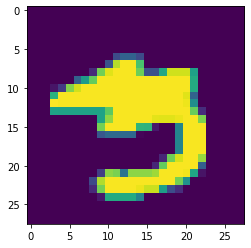

Predicted = 6 ::  Real = 0


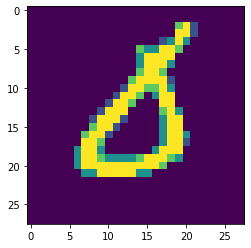

Predicted = 9 ::  Real = 4


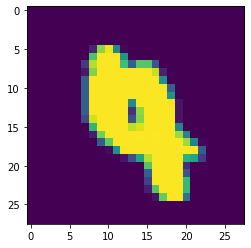

Predicted = 2 ::  Real = 0


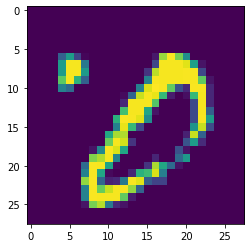

Predicted = 7 ::  Real = 2


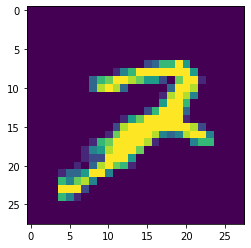

Predicted = 7 ::  Real = 4


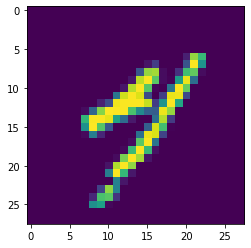

Predicted = 6 ::  Real = 5


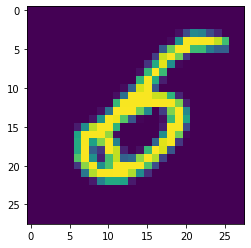

Predicted = 9 ::  Real = 4


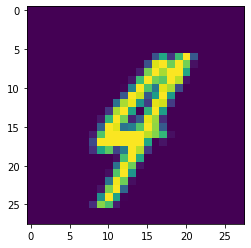

Predicted = 7 ::  Real = 2


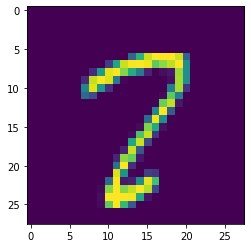

Predicted = 8 ::  Real = 2


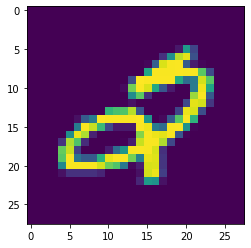

In [ ]:
# DRAW INCORRECTLY CLASSIFIED SAMPLES
idres = np.where(result>0)[1]  # find de id of the elments classified incorrectly
print('Wrong samples : ' +  str(idres.shape[0]))
for i in idres:
    print('Predicted = ' + str(np.argmax(test_out[i,:])) + ' ::  Real = ' + str(y_test[i]))
    plt.imshow(x_test[i,:,:,0])
    plt.show()

In [ ]:
tf.keras.backend.set_floatx('float64')

In [ ]:
model1.save('MNIST_model_20211119')

INFO:tensorflow:Assets written to: MNIST_model_20211119\assets


In [ ]:
model.summary()

Model: "mnist__model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2769024   
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________
